In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import cv2

In [2]:
data = pd.read_csv('../bank-additional/bank-additional-full.csv',sep=';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
data = data.drop(['duration'], axis=1)
df = data

In [4]:
print(data.columns)

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'campaign', u'pdays',
       u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')


In [5]:
print(data.shape)

(41188, 20)


In [6]:
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

In [7]:
response = data['y']

In [8]:
response = np.array(response)
np.unique(response,return_counts=True)

(array(['no', 'yes'], dtype=object), array([36548,  4640]))

In [9]:
le = LabelEncoder()
for ix in categorical_columns:
    data[ix] = le.fit_transform(data[ix])

In [10]:
data = data.dropna()
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1    999         0         1           1.1   
1            1         1    999         0         1           1.1   
2            1         1    999         0         1           1.1   
3            1         1    999         0         1           1.1   
4            1         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0

In [11]:
df = data
split = int(0.8*data.shape[0])

In [12]:
data = data.values

In [32]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(data[:split,:-1],data[:split,-1])
dt.score(data[split:,:-1],data[split:,-1])

0.700412721534353

In [34]:
dt.score(data[:,:-1],data[:,-1])

0.8961590754588715

In [35]:
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

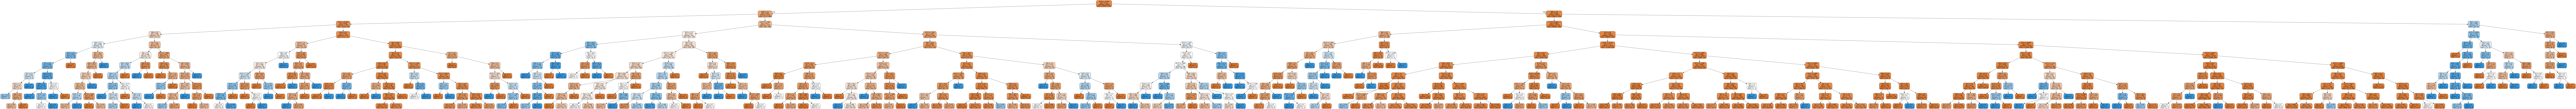

In [36]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [37]:
graph.write_png("dtreeFull.png")

True

In [40]:
rf = RandomForestClassifier(n_estimators=100,max_depth=9)
rf.fit(data[:split,:-1],data[:split,-1])
rf.score(data[split:,:-1],data[split:,-1])

0.6938577324593348

In [16]:
svm = SVC(gamma='auto')
svm.fit(data[:split,:-1],data[:split,-1])
svm.score(data[split:,:-1],data[split:,-1])

0.6916727361009953

In [17]:
svm = SVC(gamma='scale')
svm.fit(data[:split,:-1],data[:split,-1])
svm.score(data[split:,:-1],data[split:,-1])

0.6916727361009953

In [41]:
data_x = data[:,:-1]
pca = PCA(n_components=5)
data_x = pca.fit_transform(data_x)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[8.86894296e-01 1.09020879e-01 2.70368711e-03 5.12936141e-04
 3.20699596e-04]
[38380.76554773 13456.51318352  2119.12178849   923.01626108
   729.83873363]


In [42]:
print(pd.DataFrame(pca.components_,columns=df.columns[:-1],index = ['PC-1','PC-2','PC-3','PC-4','PC-5']))

           age       job   marital  education   default   housing      loan  \
PC-1  0.001914  0.000551  0.000136   0.000543 -0.000193  0.000068 -0.000002   
PC-2  0.000512  0.000432  0.000692   0.000748 -0.001028  0.000662 -0.000044   
PC-3  0.996975  0.000443 -0.022868  -0.024915  0.006594 -0.000299 -0.000538   
PC-4 -0.066737  0.116726  0.005266   0.064648 -0.002123 -0.006364 -0.002058   
PC-5  0.010481  0.985138  0.004469   0.108373 -0.003764  0.003730 -0.001589   

       contact     month  day_of_week  campaign     pdays  previous  poutcome  \
PC-1 -0.000335  0.000742     0.000056 -0.000882 -0.986683  0.001581  0.000876   
PC-2 -0.001712  0.007572    -0.000736 -0.005478  0.162591  0.002015 -0.001899   
PC-3  0.000904 -0.006020    -0.002251  0.001775  0.002053  0.000029  0.000270   
PC-4  0.024652  0.026884     0.013327 -0.028776  0.003668 -0.006672  0.007159   
PC-5 -0.009899 -0.053100    -0.004249  0.003601  0.000100  0.001502 -0.001237   

      emp.var.rate  cons.price.idx  co

In [43]:
print(data_x.shape)

(41188, 5)


In [44]:
rf.fit(data_x[:split],data[:split,-1])
rf.score(data_x[split:],data[split:,-1])

0.6917941247875699

In [57]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(data_x[:split],data[:split,-1])
dt.score(data_x[split:],data[split:,-1])

0.6903374605486768

In [58]:
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

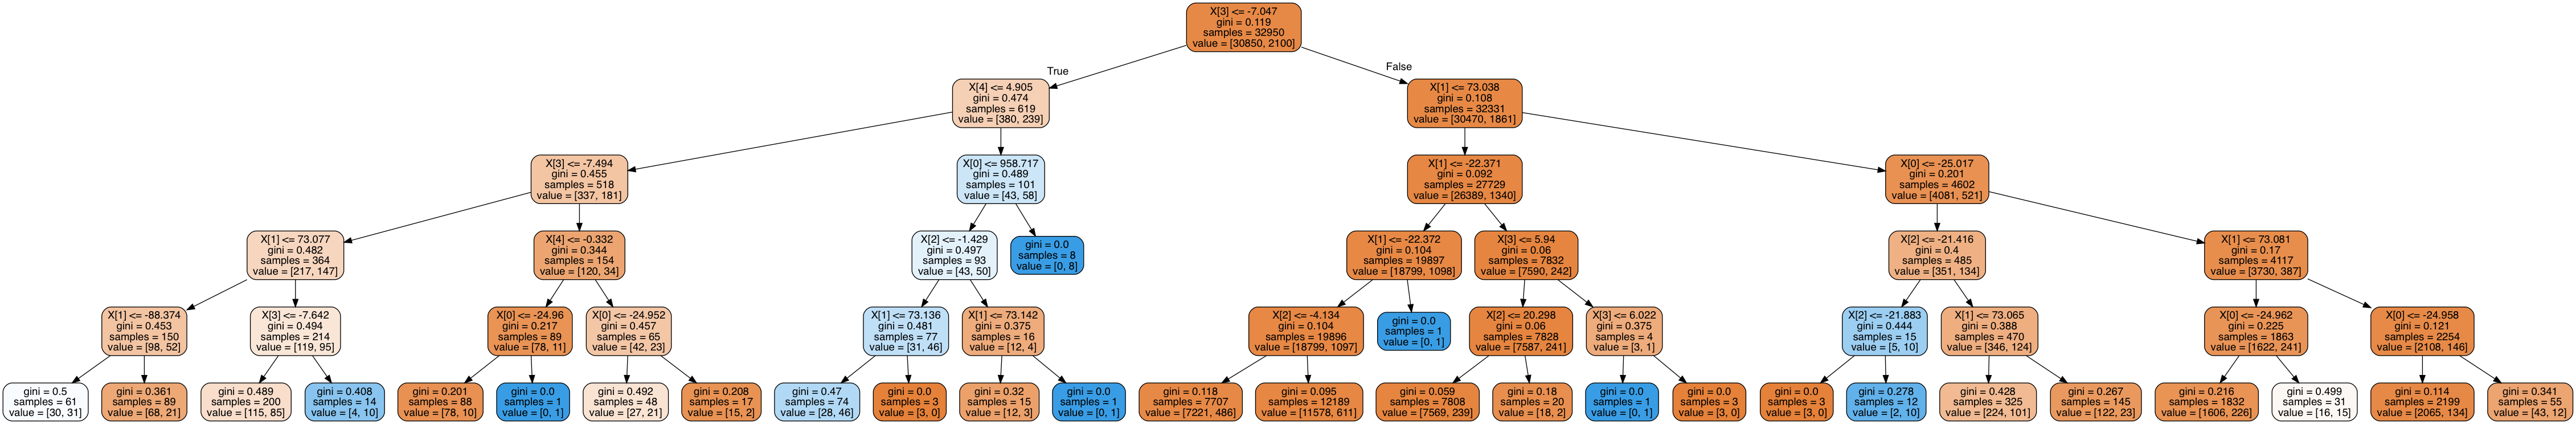

In [59]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [60]:
graph.write_png("dtreePCA.png")

True